In [1]:
import utilities
import pandas as pd
import os
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [3]:
dy_comms = utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM_20_edited.json")

FileNotFoundError: [Errno 2] No such file or directory: '/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM_20_edited.json'

## Histogram of duration

In [92]:
minimum_agent = []
dy_report = {"dy_name":[], "dynamic_length":[], "static_comm_name": [], "year": [], "min_stat_size": []}

for DY_name, values in dy_comms.items():
        min_year = 2010
        min_com = ""
        min_len = 10000
        for item in values:
            com_len = len(utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/"                                 +str(item[1])+"/"+item[0]))
            if com_len < min_len:
                min_com = item[0]
                min_year = item[1]
                min_len = com_len
        dy_report["dy_name"].append(DY_name)
        dy_report["dynamic_length"].append(len(values))
        dy_report["static_comm_name"].append(min_com)
        dy_report["year"].append(min_year)
        dy_report["min_stat_size"].append(min_len)
df = pd.DataFrame(dy_report)

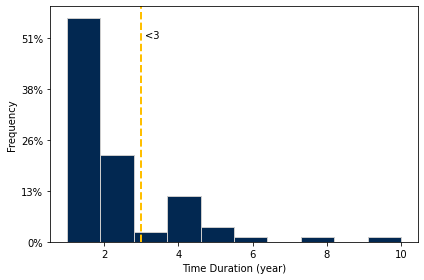

In [51]:
x = df["dynamic_length"]
n_bins = 10

fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(x, bins=n_bins, color="#022851", edgecolor='#CCCCCC')
plt.axvline(x=3, color='#FFBF00', linestyle='dashed', linewidth=2)
plt.text(3.1, 40, '<3')
plt.xlabel("Time Duration (year)")
plt.ylabel("Frequency")
axs.yaxis.set_major_formatter(PercentFormatter(xmax=len(x)))
plt.savefig("duration.pdf")

<ipython-input-52-003051114261>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("size.pdf")
<ipython-input-52-003051114261>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.savefig("size.pdf")
/home/c6/anaconda3/envs/dock/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


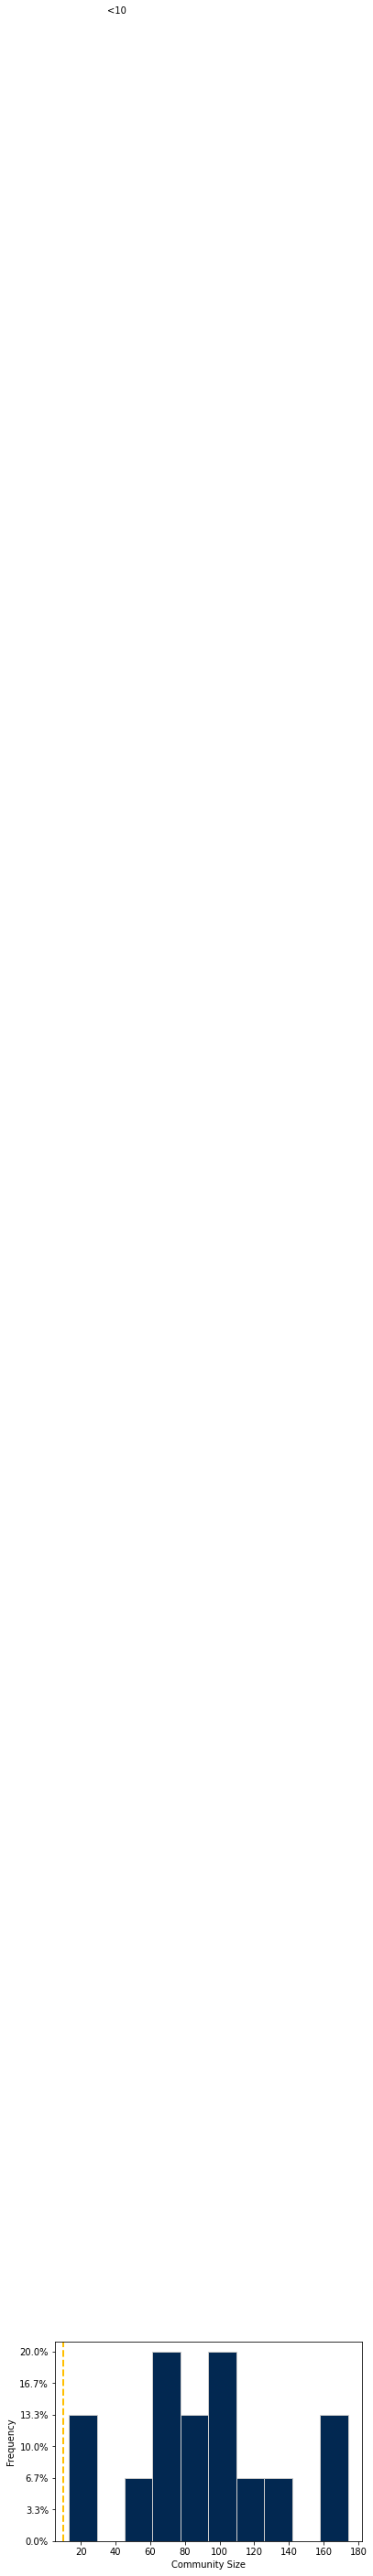

In [52]:
n_bins = 10

# Generate a normal distribution, center at x=0 and y=5
#x = df["min_stat_size"]
y = df[df["dynamic_length"]>3]
x = y["min_stat_size"]
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
axs.hist(x, bins=n_bins, color="#022851", edgecolor='#CCCCCC')

plt.axvline(x=10, color='#FFBF00', linestyle='dashed', linewidth=2)
plt.text(35, 40, '<10')
plt.xlabel("Community Size")
plt.ylabel("Frequency")
axs.yaxis.set_major_formatter(PercentFormatter(xmax=len(x)))
plt.savefig("size.pdf")

In [49]:
y = df[df["dynamic_length"]>3]
x = y["min_stat_size"]
len(df)

78

In [113]:
selected_comms_df = df[df["dynamic_length"]>3]
selected_comms_df.reset_index(drop=True)

,dy_name,dynamic_length,static_comm_name,year,min_stat_size
0,0,4,C_3,2013,70
1,1,5,C_6,2013,104
2,2,4,C_2,2013,13
3,5,5,C_7,2010,86
4,6,10,C_0,2010,84
5,8,8,C_7_4,2013,70
6,11,6,C_5_3,2014,100
7,22,4,C_2_0,2017,126
8,23,4,C_2_2,2017,59
9,24,4,C_2_3,2016,174


In [95]:
selected_comms_df.iloc[6]["dynamic_length"]

6

In [59]:
selected_comms = utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM/selected_comms/selected_DY_communities.json")

In [121]:
selected_comms_df_copy = selected_comms_df.copy()
avg_fpjs2_list = []
total_fpjs2_list = []
avg_high_ratio_list = []
total_high_ratio_list = []
avg_pure_api_list = []
total_pure_api_list = []

idx = 0
for _, row in selected_comms_df.iterrows():
    print(idx)
    sum_fpjs2 = 0
    sum_high_ratio = 0
    sum_pure_api = 0
    dy_name = row["dy_name"]
    if dy_name == "5":
        avg_fpjs2_list.append(0)
        total_fpjs2_list.append(0)
        avg_high_ratio_list.append(0)
        total_high_ratio_list.append(0)
        avg_pure_api_list.append(0)
        total_pure_api_list.append(0)
        
        idx += 1
        continue
    for static_comms in selected_comms[str(dy_name)]:
        static_com = static_comms[0]
        year = static_comms[1]
        static_comm_report = utilities.read_json \
            (os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs",
                          str(year), "comm_report.json"))
        for item in static_comm_report:
            if item["cluster"] == static_com:
                sum_fpjs2 += item["fpjs2"]
                sum_high_ratio += item["ratio_16"]
                sum_pure_api += item["pure"]
                break

    avg_fpjs2_list.append(sum_fpjs2 / selected_comms_df.iloc[idx]["dynamic_length"])
    total_fpjs2_list.append(sum_fpjs2)
    avg_high_ratio_list.append(sum_high_ratio / selected_comms_df.iloc[idx]["dynamic_length"])
    total_high_ratio_list.append(sum_high_ratio)
    avg_pure_api_list.append(sum_pure_api / selected_comms_df.iloc[idx]["dynamic_length"])
    total_pure_api_list.append(sum_pure_api)
    
    idx += 1

selected_comms_df_copy["avg_fpjs2"] = avg_fpjs2_list
selected_comms_df_copy["total_fpjs2"] = total_fpjs2_list

selected_comms_df_copy["avg_high_ratio"] = avg_high_ratio_list
selected_comms_df_copy["total_high_ratio"] = total_high_ratio_list

selected_comms_df_copy["avg_pure_api"] = avg_pure_api_list
selected_comms_df_copy["total_pure_api"] = total_pure_api_list



0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [122]:
selected_comms_df_copy

,dy_name,dynamic_length,static_comm_name,year,min_stat_size,avg_fpjs2,total_fpjs2,avg_high_ratio,total_high_ratio,avg_pure_api,total_pure_api
0,0,4,C_3,2013,70,5.000000,20,1.000,4,0.000000,0
1,1,5,C_6,2013,104,6.600000,33,2.000,10,0.400000,2
2,2,4,C_2,2013,13,2.000000,8,0.000,0,0.000000,0
5,5,5,C_7,2010,86,0.000000,0,0.000,0,0.000000,0
6,6,10,C_0,2010,84,7.700000,77,1.900,19,1.100000,11
8,8,8,C_7_4,2013,70,6.875000,55,1.875,15,1.250000,10
11,11,6,C_5_3,2014,100,9.333333,56,7.500,45,8.666667,52
22,22,4,C_2_0,2017,126,5.250000,21,1.250,5,4.750000,19
23,23,4,C_2_2,2017,59,1.500000,6,2.000,8,4.000000,16
24,24,4,C_2_3,2016,174,2.750000,11,7.750,31,2.750000,11


### Compare keywords in FP an non-FP clusters with keywords extacted from FP scripts in all snapshots

In [ ]:
# all_keywords_from_scripts

In [3]:
all_keywords_from_scripts = set ()  # len:2003
years = np.arange(2010,2020,1)
for year in years: 
    fp_files = utilities.get_files_in_a_directory("/home/c6/Desktop/OpenWPM/jsons/AST/CDX_results/fp_files/"
                                                  +str(year)+"/api_features")
    for fp_script in fp_files:
        fp_script_content = utilities.read_list_compressed(fp_script)
        all_keywords_from_scripts.update(fp_script_content)
if "Vibration" in all_keywords_from_scripts:
    print("yes")

In [5]:
#after_filtered_keywords

In [4]:
after_filtered_keywords = set() # len: 3654==>4934
base_dir = "/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM"
API_interface_keyword = utilities.read_json(os.path.join(base_dir, "labeling_clusters_edited/API_interface_keyw.json"))
for API, value in API_interface_keyword.items():
    after_filtered_keywords.add(API)
    for interface in value["interface"]:
        after_filtered_keywords.add(interface)
    for api_keyword in value["api_keyw"]:
        after_filtered_keywords.add(api_keyword)
print(len(after_filtered_keywords))

4931


In [18]:
# before_filtered_keywords

In [5]:
before_filtered_keywords = set() # 6060

API_interface = utilities.read_json(os.path.join(base_dir, "labeling_clusters_edited/API_interface_dict.json"))
interface_keyword = utilities.read_json(os.path.join(base_dir, "labeling_clusters_edited/interface_keyword.json"))

for API, interface_list in API_interface.items():
    before_filtered_keywords.add(API)
    for interface in interface_list:
        before_filtered_keywords.add(interface)
for interface, keyw_list in interface_keyword.items():
    before_filtered_keywords.add(interface)
    for keyw in keyw_list:
        before_filtered_keywords.add(keyw)
print(len(before_filtered_keywords))

6059


In [6]:
eligible_keywords = all_keywords_from_scripts.intersection(after_filtered_keywords) # 712 ==> 1188

In [7]:
print(len(eligible_keywords))

1188


In [8]:
eligible_keywords

{'lengthComputable',
 'createMediaStreamSource',
 'timeupdate',
 'EXT_frag_depth',
 'encodings',
 'tel',
 'service',
 'deviceorientation',
 'iterateNext',
 'variable',
 'levelchange',
 'statusCode',
 'amount',
 'facingMode',
 'childList',
 'addRule',
 'showNotification',
 'bufferedAmountLowThreshold',
 'rangeMin',
 'shadowBlur',
 'webdriver',
 'collapsed',
 'isFile',
 'subtree',
 'remoteCandidateId',
 'argument',
 'productID',
 'lineno',
 'userAgent',
 'requestStart',
 'restore',
 'equals',
 'removeListener',
 'redirect',
 'createRadialGradient',
 'removeAttributeNS',
 'PointerEvent',
 'msExitFullscreen',
 'channelCountMode',
 'Report',
 'getEntriesByName',
 'MediaDevices',
 'lineJoin',
 'addColorStop',
 'dragenter',
 'OES_texture_half_float',
 'MimeType',
 'getSupportedConstraints',
 'createHTMLDocument',
 'responseEnd',
 'methodName',
 'URL',
 'onremovestream',
 'defaultPlaybackRate',
 'getBattery',
 'cy',
 'History',
 'clientWidth',
 'pageTop',
 'viewBox',
 'TIMEOUT',
 'trace',
 'ge

In [ ]:
# Overlap with clusters G and H

In [9]:
dy_clusters = utilities.read_json("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM/selected_comms/selected_DY_communities.json")

In [10]:
cluster_G = dy_clusters["26"]
cluster_G_keyws = set()
for statics in cluster_G:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_G_keyws.update(keywords)
    
cluster_H = dy_clusters["55"]
cluster_H_keyws = set()
for statics in cluster_H:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_H_keyws.update(keywords)
    
cluster_GandH_keys = cluster_G_keyws.union(cluster_H_keyws)
print(len(cluster_GandH_keys))
print(len(cluster_GandH_keys.intersection(eligible_keywords))/len(eligible_keywords))
GH_overlap = cluster_GandH_keys.intersection(eligible_keywords)
#GH_overlap

1523
0.627104377104377


In [ ]:
# Overlap with clusters O and P

In [11]:
cluster_O = dy_clusters["32"]
cluster_O_keyws = set()
for statics in cluster_O:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_O_keyws.update(keywords)

cluster_P = dy_clusters["29"]
cluster_P_keyws = set()
for statics in cluster_P:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_P_keyws.update(keywords)
    
cluster_OandP_keys = cluster_O_keyws.union(cluster_P_keyws)
print(len(cluster_OandP_keys))
print(len(cluster_OandP_keys.intersection(eligible_keywords))/len(eligible_keywords))

925
0.3058623619371283


In [ ]:
# Overlap with A

In [12]:
cluster_A = dy_clusters["0"]
cluster_A_keyws = set()
for statics in cluster_A:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_A_keyws.update(keywords)
    
print(len(cluster_A_keyws))
print(len(cluster_A_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

370
10.960067969413764


In [ ]:
# Overlap with B

In [46]:
cluster_B = dy_clusters["2"]
cluster_B_keyws = set()
for statics in cBluster_B:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_B_keyws.update(keywords)
    
print(len(cluster_B_keyws))
print(len(cluster_B_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

59
1.4234875444839856


In [ ]:
# Overlap with C

In [47]:
cluster_C = dy_clusters["6"]
cluster_C_keyws = set()
for statics in cluster_C:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_C_keyws.update(keywords)
    
print(len(cluster_C_keyws))
print(len(cluster_C_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

637
20.462633451957295


In [ ]:
# Overlap with D

In [48]:
cluster_D = dy_clusters["1"]
cluster_D_keyws = set()
for statics in cluster_D:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_D_keyws.update(keywords)
    
print(len(cluster_D_keyws))
print(len(cluster_D_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

508
15.302491103202847


In [ ]:
# Overlap with F

In [49]:
cluster_F = dy_clusters["8"]
cluster_F_keyws = set()
for statics in cluster_F:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_F_keyws.update(keywords)
    
print(len(cluster_F_keyws))
print(len(cluster_F_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

567
18.14946619217082


In [ ]:
# Overlap with I

In [50]:
cluster_I = dy_clusters["11"]
cluster_I_keyws = set()
for statics in cluster_I:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_I_keyws.update(keywords)
    
print(len(cluster_I_keyws))
print(len(cluster_I_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

584
17.259786476868328


In [ ]:
# Overlap with J

In [51]:
cluster_J = dy_clusters["28"]
cluster_J_keyws = set()
for statics in cluster_J:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_J_keyws.update(keywords)
    
print(len(cluster_J_keyws))
print(len(cluster_J_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

130
3.202846975088968


In [ ]:
# Overlap with K

In [53]:
cluster_K = dy_clusters["24"]
cluster_K_keyws = set()
for statics in cluster_K:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_K_keyws.update(keywords)
    
print(len(cluster_K_keyws))
print(len(cluster_K_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

686
15.836298932384341


In [ ]:
# Overlap with L

In [55]:
cluster_L = dy_clusters["23"]
cluster_L_keyws = set()
for statics in cluster_L:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_L_keyws.update(keywords)
    
print(len(cluster_L_keyws))
print(len(cluster_L_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

151
3.0249110320284696


In [ ]:
# Overlap with M

In [56]:
cluster_M = dy_clusters["25"]
cluster_M_keyws = set()
for statics in cluster_M:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_M_keyws.update(keywords)
    
print(len(cluster_M_keyws))
print(len(cluster_M_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

323
10.320284697508896


In [ ]:
# Overlap with N

In [57]:
cluster_N = dy_clusters["22"]
cluster_N_keyws = set()
for statics in cluster_N:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_N_keyws.update(keywords)
    
print(len(cluster_N_keyws))
print(len(cluster_N_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

290
10.85409252669039


In [ ]:
# Overlap with O

In [58]:
cluster_O = dy_clusters["32"]
cluster_O_keyws = set()
for statics in cluster_O:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_O_keyws.update(keywords)
    
print(len(cluster_O_keyws))
print(len(cluster_O_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

755
23.131672597864767


In [ ]:
# Overlap with P

In [59]:
cluster_P = dy_clusters["29"]
cluster_P_keyws = set()
for statics in cluster_C:
    static_comm_name = statics[0]
    year = str(statics[1])
    keywords = utilities.read_json(os.path.join("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs", 
                                                year, static_comm_name))
    cluster_P_keyws.update(keywords)
    
print(len(cluster_P_keyws))
print(len(cluster_P_keyws.intersection(eligible_keywords))/len(eligible_keywords)*100)

637
20.462633451957295


In [64]:
cluster_non_FP = cluster_A_keyws.union(cluster_B_keyws, cluster_C_keyws, cluster_D_keyws,cluster_F_keyws, 
                                       cluster_I_keyws, cluster_J_keyws, cluster_K_keyws, cluster_L_keyws,
                                      cluster_M_keyws, cluster_N_keyws, cluster_O_keyws, cluster_P_keyws)
print(len(cluster_non_FP))
print(len(cluster_non_FP.intersection(eligible_keywords))/len(eligible_keywords)*100/12) 

2712
6.198102016607355


# Find Overlap of DB with GH_overlap

In [11]:
base_dir = "/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs/DY_COMM"
API_interface_keywords = utilities.read_json(os.path.join
                         (base_dir, "labeling_clusters_edited/API_interface_keyw.json"))
API_keywords = {}


for API, values in API_interface_keywords.items():
    interfaces = [interface for interface in values["interface"] if interface in GH_overlap]
    keywords = [keyw for keyw in values["api_keyw"] if keyw in GH_overlap]
    if API in GH_overlap:
        interfaces.append(API)
    if len(set(interfaces + keywords )) > 0:
        API_keywords[API] = []
        API_keywords[API] = set(interfaces + keywords)

In [12]:
API_keywords

{'CSS_T_Object_Model': {'CSSRuleList',
  'Screen',
  'addListener',
  'addRule',
  'availHeight',
  'availLeft',
  'availTop',
  'availWidth',
  'colorDepth',
  'contextMenu',
  'currentSrc',
  'deleteRule',
  'insertRule',
  'isContentEditable',
  'itemRef',
  'mozOrientation',
  'offsetHeight',
  'offsetWidth',
  'onorientationchange',
  'outerText',
  'pixelDepth',
  'propertyName',
  'rules',
  'sub',
  'unit'},
 'Sensor_APIs': {'AmbientLightSensor',
  'DeviceMotionEvent',
  'DeviceOrientationEvent',
  'absolute',
  'acceleration',
  'accelerationIncludingGravity',
  'alpha',
  'devicemotion',
  'gamma',
  'illuminance',
  'rotationRate'},
 'Encrypted_Media_Extensions_API': {'expiration', 'sessionId'},
 'Document_Object_Model': {'DOMParser',
  'NotAllowedError',
  'NotFoundError',
  'QuotaExceededError',
  'SVGElementInstance',
  'SyntaxError',
  'TimeoutError',
  'Window',
  '_blank',
  'addedNodes',
  'afterprint',
  'alert',
  'beforeinstallprompt',
  'beforeprint',
  'beforeunl

### find year of appearence 

In [13]:
fp_clusters_G = utilities.read_json(
    os.path.join(base_dir, "selected_comms/selected_DY_communities.json"))["26"]


new_dict = {}

"""for API, keyword_list in API_keywords.items():
    new_dict[API] = {}
    for keyw in keyword_list:
        for static_cluster in fp_clusters_H:
            static_name = static_cluster[0]
            year = static_cluster[1]
            static_content = utilities.read_json(os.path.join
                                                 ("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs",
                                                  str(year), static_name))
            if keyw in static_content:
                new_dict[API][keyw] = year
                break"""

"""for API, keyword_list in API_keywords.items():
    new_dict[API] = {}
    for keyw in keyword_list:
        if keyw not in new_dict[API].keys():
            new_dict[API][keyw] = 2100
        for static_cluster in fp_clusters_G:
            static_name = static_cluster[0]
            year = static_cluster[1]
            static_content = utilities.read_json(os.path.join
                                                 ("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs",
                                                  str(year), static_name))
            if keyw in static_content:
                if new_dict[API][keyw] > year:
                    new_dict[API][keyw] = year
                    break"""
                    
for API, keyword_list in API_keywords.items():
    new_dict[API] = {}
    for keyw in keyword_list:
        for static_cluster in fp_clusters_G:
            static_name = static_cluster[0]
            year = static_cluster[1]
            static_content = utilities.read_json(os.path.join
                                                 ("/home/c6/Desktop/OpenWPM/jsons/community_tracking/real_graphs",
                                                  str(year), static_name))
            if keyw in static_content:
                if keyw not in new_dict[API].keys():
                    new_dict[API][keyw] = year
                else:
                    if new_dict[API][keyw] > year:
                        new_dict[API][keyw] = year
                        break

#### Add year of appearance in ourdatase

In [14]:
new_dict

{'CSS_T_Object_Model': {'offsetHeight': 2018,
  'addListener': 2017,
  'offsetWidth': 2018,
  'mozOrientation': 2016,
  'onorientationchange': 2016,
  'availTop': 2016,
  'availWidth': 2015,
  'insertRule': 2011,
  'itemRef': 2019,
  'outerText': 2017,
  'Screen': 2017,
  'unit': 2018,
  'isContentEditable': 2017,
  'deleteRule': 2011,
  'propertyName': 2015,
  'rules': 2011,
  'colorDepth': 2016,
  'CSSRuleList': 2019,
  'sub': 2018,
  'availHeight': 2015,
  'contextMenu': 2018,
  'currentSrc': 2013,
  'availLeft': 2015,
  'addRule': 2018,
  'pixelDepth': 2015},
 'Sensor_APIs': {'absolute': 2018,
  'accelerationIncludingGravity': 2018,
  'AmbientLightSensor': 2019,
  'alpha': 2018,
  'acceleration': 2017,
  'gamma': 2018,
  'DeviceMotionEvent': 2017,
  'devicemotion': 2017,
  'rotationRate': 2018,
  'illuminance': 2018,
  'DeviceOrientationEvent': 2018},
 'Encrypted_Media_Extensions_API': {'sessionId': 2013, 'expiration': 2015},
 'Document_Object_Model': {'pageshow': 2013,
  'onhashch

In [42]:
keyword = "Touch_events"

In [43]:
print(len(API_interface_keywords[keyword]["interface"])+len(API_interface_keywords[keyword]["api_keyw"]))
API_interface_keywords[keyword]

36


{'interface': ['TouchList', 'TouchEvent', 'Force_Touch_events', 'Touch'],
 'api_keyw': ['WEBKIT_FORCE_AT_MOUSE_DOWN',
  'targetTouches',
  'webkitmouseforcewillbegin',
  'touchenter',
  'touchcancel',
  'touchend',
  'ontouchenter',
  'touchleave',
  'TouchEventHandlers',
  'altitudeAngle',
  'WEBKIT_FORCE_AT_FORCE_MOUSE_DOWN',
  'ontouchmove',
  'changedTouches',
  'ontouchend',
  'ontouchstart',
  'force',
  'webkitmouseforcedown',
  'touchType',
  'radiusX',
  'identifiedTouch',
  'touchstart',
  'touchmove',
  'ontouchcancel',
  'metaEnabled',
  'radiusY',
  'webkitmouseforcechanged',
  'touches',
  'ontouchleave',
  'webkitForce',
  'azimuthAngle',
  'rotationAngle',
  'webkitmouseforceup']}

In [44]:
df = pd.concat({k: pd.DataFrame.from_dict(v, 'index') for k, v in new_dict.items()}, axis=0)


if keyword in new_dict.keys():
    print(len(df.loc[keyword]))
    print(df.loc[keyword])
else:
    print("Non FP Keyword")

8
                  0
radiusX        2017
touchenter     2016
TouchEvent     2015
force          2013
touchleave     2016
rotationAngle  2017
ontouchstart   2011
radiusY        2017
